In [23]:
import pandas as pd

df = pd.read_csv("participants.csv")

columns_to_keep = [
    "age", "gender", "occupation", "linguistics",
    "general_impression", "positive_feedback", "improvement_suggestions"
]

filtered_df = df.dropna(subset=["general_impression", "positive_feedback", "improvement_suggestions"], how='all')

filtered_df = filtered_df[columns_to_keep]

filtered_df.to_csv("filtered_participants.csv", index=False)

print("Filtered CSV file saved as 'filtered_participants.csv'.")


Filtered CSV file saved as 'filtered_participants.csv'.


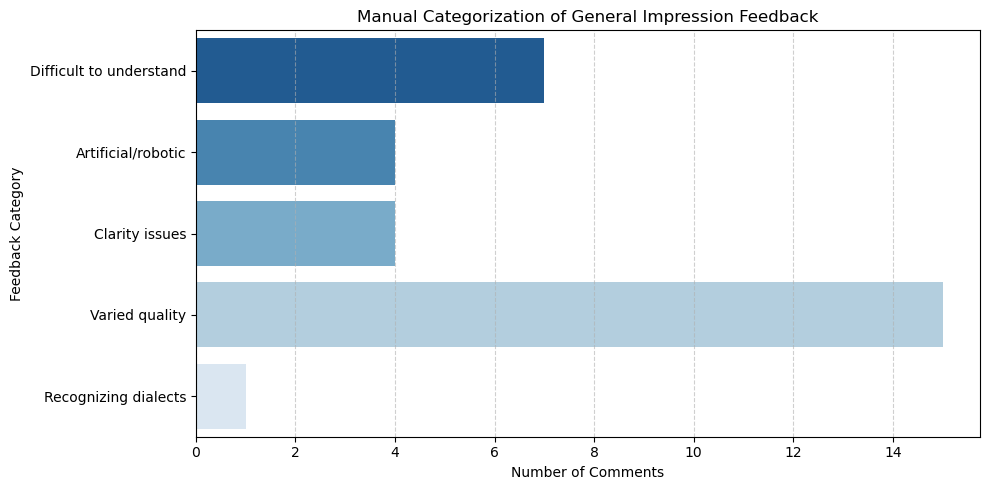

In [24]:
import seaborn as sns
from collections import Counter

# Raw qualitative feedback
feedback_dict = {
    1: "Umulig å skjønne hva som ble sagt!",
    2: "De var litt uklare",
    3: "Vanskelige å forstå",
    4: "Skjønner ikke helt om alle er kunstige eller ikke.",
    5: "Veldig dårlige og noen veldig gode.",
    6: "Problemer med å høre hva de sier på enkelte klipp. Snakker for fort. Ellers greit",
    7: "At setningen ofte er vanskeligst å forstå enten på starten eller slutten av klippet",
    8: "Noen var veldig mye tydeligere enn andre, noen virket ikke som ord engang og noen virket som de var satt random sammen.",
    9: "Mitt generelle inntrykk av lydklippene var at de stort sett var enkle å høre og forstå, men jeg opplevde at det krevde mye konsentrasjon for å virkelig tolke innholdet. Dette skyldes i stor grad variasjoner i lydkvalitet og tydelighet i talene.",
    10: "De fleste var vanskelige å tyde",
    11: "Variert, noen veldig gode - men de fleste var tydelig kunstige. 'Mekanisk' undertone",
    12: "Bra, men generelt litt vanskelig å hente ut essensen i hva som ble sagt",
    13: "Utydelig",
    14: "Dårlig",
    15: "Noen skurrer og det gjorde at jeg følte de var mer unaturlig og som roboter. Vanskelig å gjette dialektene på så korte sekunder",
    16: "Mange ord fløt inn i hverandre, manglet tydelig diksjon",
    17: "Mange av klippene var vanskelige å skjønne",
    18: "Ikke noe spesielt. Noen av enklere å forstå enn andre.",
    19: "Stor spredning i kvalitet",
    20: "Vanskelig å høre hva de sa. Tonefall hørtes bra ut på noen, men veldig feil på andre",
    21: "At de syntetiske hadde en metallisk klang",
    22: "Jeg er dårlig på dialekter, så dette ble litt vanskelig. Ok til middels klipp",
    23: "Noen er bra men de meste høres ut som en pilot som snakker over radioen",
    24: "Veldig vanskelig å forstå hva de sier. Føles som de fleste var av samme dialekt.",
    25: "Ville blitt lurt av dette.",
    26: "Helt ok! Var på en måte alltid ett av klippene som var mye bedre enn den andre.",
    27: "Noen var veldig bra og noen dårlig",
    28: "God",
    29: "Varierende kvalitet",
    30: "At det var en som var spilt inn av et menneske og et som var si generert",
    31: "Noen var forståelige med forskjellig tonefall som gjorde at det hørtes ut som de hadde en dialekt."
}

# Manually categorizing the feedback into themes
categories = {
    "Difficult to understand": [1,3,10,13,14,17,24],
    "Artificial/robotic": [4,11,21,23],
    "Clarity issues": [2,7,16,30],
    "Varied quality": [5,6,8,9,12,18,19,20,22,25,26,27,28,29,31],
    "Recognizing dialects": [15]
}


category_counts = {cat: len(ids) for cat, ids in categories.items()}

df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Count", y="Category", palette="Blues_r")
plt.xlabel("Number of Comments")
plt.ylabel("Feedback Category")
plt.title("Manual Categorization of General Impression Feedback")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("feedback_categories_general_impression.pdf")
plt.show()

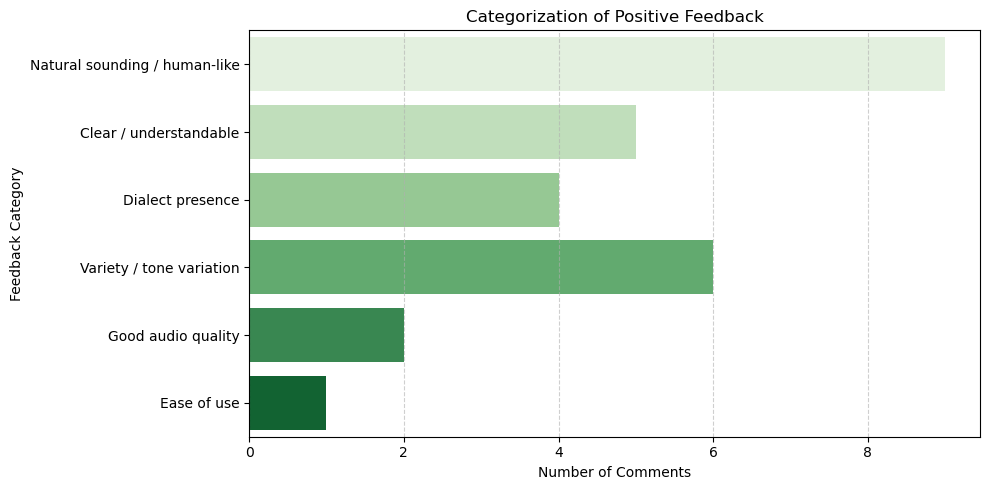

In [25]:
# Positive feedback list
positive_feedback_dict = {
    1: "De unngikk å sløse tid ved å være korte.",
    2: "Vet ikke det skal vel være å sammenligne klippen med hverandre. Kanskje de alle var AI!",
    3: "Stemmene hørtes ekte ut",
    4: "De føltes alle nokså naturlige, noen skilte seg veldig ut og var veldig tydelige og føltes veldig ekte ut.",
    5: "At du kan høre dialekt",
    6: "At man kunne lytte flere ganger",
    7: "Flere lydklipp scorte bra i alle kategorier",
    8: "De var ulike og hadde nyanser i toneleie.",
    9: "Det som var bra med lydklippene, var at mange av dem hadde tydelig og forståelig tale, noe som gjorde det enklere å følge med. I tillegg var dialektene i flere av klippene godt representert og autentiske, noe som bidro til en realistisk framstilling.",
    10: "De fleste hørtes veldig naturlig og menneskelige ut",
    11: "Flere trakk inn gode dialektelementer, fresmto autentisk!",
    12: "tydelig lyd!",
    13: "Vet ikke",
    14: "Hørtes elte ut",
    15: "Ulike talemåter og virker kjente",
    16: "Stedvis naturlig flyt i språket",
    17: "Noen hadde bra stemme og lyd, med et klart språk",
    18: "Kult å få frem dialekt. Er ikke vandt å høre det språkmodeller.",
    19: "De sier noe som noen ville funnet på å si",
    20: "Noen hørtes helt autentiske ut",
    21: "Intuitivt UX. Enkelt å trykke for å spille av.",
    22: "To av dem var veldig tydelige.",
    23: "det var lett å høre et det far forskjellige dialekter",
    24: "Av noen var greie å forstå og hørtes naturlig ut.",
    25: "Hører ut som ekte stemmer, noen av disse.",
    26: "Fint med dialekt!",
    27: "Autensiteten i stemmene på de første 10 ca på A",
    28: "Ene klippet var tydelig",
    29: "Noen av dem var tydelig og lett å forstå",
    30: "Vet ikke",
    31: "At det var klare tegn av forskjell i dialekt på noen av de."
}
# Categorization of positive feedback
positive_categories = {
    "Natural sounding / human-like": [2,3,4,10,14,19,20,25,27],
    "Clear / understandable": [17,22,24,28,29],
    "Dialect presence": [5,9,11,18],
    "Variety / tone variation": [8,15,16,23,26,31],
    "Good audio quality": [7,12],
    "Ease of use": [21],
}

positive_counts = {category: len(indices) for category, indices in positive_categories.items()}

positive_df = pd.DataFrame(positive_counts.items(), columns=["Category", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=positive_df, x="Count", y="Category", palette="Greens")
plt.xlabel("Number of Comments")
plt.ylabel("Feedback Category")
plt.title("Categorization of Positive Feedback")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("feedback_categories_positive_feedback.pdf")
plt.show()


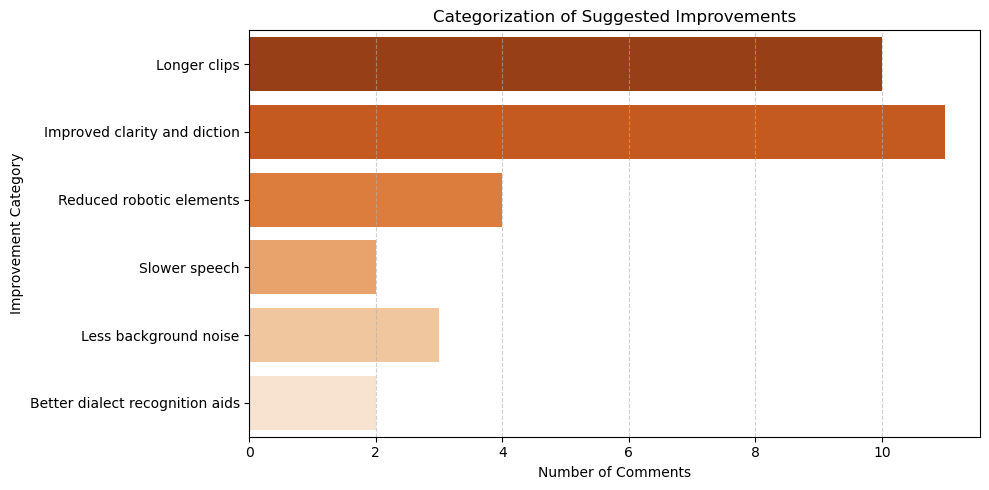

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# List of qualitative feedback on suggested improvements
suggested_improvements_dict = {
    1: "Ville hadde lenger opptak så man i større grad kunne plukke opp mønstre i talen.",
    2: "Litt lenger tal så man oppfatter litt mere - de var litt for korte!",
    3: "Forståelighet",
    4: "Noen var litt creepy robotstemme, og noen var det umulig å tyde noen ord.",
    5: "De kunne vært lengre for å få bedre kunnskap om hvor personen kom fra.",
    6: "Snakk saktere",
    7: "Lengre for å få mer inntrykk",
    8: "Hørte ingen kvinner tror jeg. Kunne vært tydeligere hvilke dialekter som det kunne være, en oversikt, da jeg tror jeg kjente igjen flere dialekter, men glemmer navn på dem.",
    9: "Noen av lydklippene kan forbedres ved å justere stemmekvaliteten, da enkelte hadde skjærende lyder som kunne virke distraherende og ubehagelige å høre på. I tillegg opplevde jeg at enkelte klipp var vanskelige å forstå på grunn av mumling.",
    10: "Tydelighet på hva som blir sagt",
    11: "Vanskelig å beskrive - men 'mumlingen' og det noe statiske støyet? ref. 'mekanisk'",
    12: "lengde?",
    13: "Litt lengre",
    14: "Noen var uforståelige og dårlig uttale",
    15: "Lenger klipp for å gjøre det lettere å skjønne hva de snakker om og gjette dialekt",
    16: "Diksjon, det ble veldig mye ord som hørtes ut som mumling",
    17: "Klarere uttalelse og mindre støy i stemmen",
    18: "Mer forståelig",
    19: "Lengre klipp",
    20: "Rytme i språk, tydelighet og tonefall",
    21: "Mindre bakgrunnsstøy? Og mer variasjon i dialekter? Men ellers veldig bra!",
    22: "Tydelighet. Naturlighet og autensitet er ikke så nøye, jeg slet mest med forståelsen av hva de sa.",
    23: "skurre-lyden",
    24: "Snakke mer tydelig og mer naturlig.",
    25: "Noen av dem var for utydelige til å gjøre opp ei meining.",
    26: "Kanskje transcript eller noe etter? Lengre lydklipp?",
    27: "Det gikk for sakte og hakkete på de fleste på B",
    28: "Usikker",
    29: "Noen av dem snakket litt for fort og snøvlete. Også var det en del forstyrrende sus i bakgrunnen",
    30: "Vanskelig å høre",
    31: "Lengre setninger"
}


# Categorization of suggested improvements
improvement_categories = {
    "Longer clips": [1,2,5,7,12,15,17,19,26,31],
    "Improved clarity and diction": [3,10,14,16,18,20,22,24,25,27,30],
    "Reduced robotic elements": [4,9,11,17],
    "Slower speech": [6,29],
    "Less background noise": [21,23,29],
    "Better dialect recognition aids": [8,21],
}


improvement_counts = {category: len(entries) for category, entries in improvement_categories.items()}

improvement_df = pd.DataFrame(improvement_counts.items(), columns=["Category", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=improvement_df, x="Count", y="Category", palette="Oranges_r")
plt.xlabel("Number of Comments")
plt.ylabel("Improvement Category")
plt.title("Categorization of Suggested Improvements")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("feedback_categories_suggested_improvements.pdf")
plt.show()
